In [1]:
import os

try:
    os.chdir('/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data/')
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import timedelta

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
import platform
if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': 
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
os.getcwd()

'/Users/cha/Desktop/공모전/삼성화재X포스텍_리스크경진대회/내코드/data'

# Data Load

## 기후 데이터

In [6]:
temp1 = pd.read_csv('예측모델data/상파울루2015.csv')
temp2 = pd.read_csv('예측모델data/상파울루2017.csv')
temp3 = pd.read_csv('예측모델data/상파울루2020.csv')

In [7]:
# 데이터프레임 합치기 (세로로 합치기)
temp = pd.concat([temp1, temp2, temp3], axis=0)

In [8]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 974
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2922 non-null   object 
 1   datetime          2922 non-null   object 
 2   tempmax           2922 non-null   float64
 3   tempmin           2922 non-null   float64
 4   temp              2922 non-null   float64
 5   feelslikemax      2922 non-null   float64
 6   feelslikemin      2922 non-null   float64
 7   feelslike         2922 non-null   float64
 8   dew               2922 non-null   float64
 9   humidity          2922 non-null   float64
 10  precip            2922 non-null   float64
 11  precipprob        2922 non-null   int64  
 12  precipcover       2922 non-null   float64
 13  preciptype        930 non-null    object 
 14  snow              356 non-null    float64
 15  snowdepth         356 non-null    float64
 16  windgust          1137 non-null   float64
 

In [9]:
daylight_duration = []
temp['sunrise'] = pd.to_datetime(temp['sunrise'])
temp['sunset'] = pd.to_datetime(temp['sunset'])

# 일조시간 계산
temp['daylight_duration'] = (temp['sunset'] - temp['sunrise']).dt.total_seconds() / 3600  # 시간 단위로 변환

In [305]:
score = pd.read_excel('예측모델data/커피재배지수original.xlsx')
score

,year,humidity20,기온30,강수량30,풍속10,일조시간10,가산점,커피재배지수,연강수량,브라질 커피 생산량,상파울루 커피생산량
0,2015,15.34,24.49,20,10,10,-3,61.49,1896.8,31233631,2423292
1,2016,15.68,20.82,30,10,10,0,70.82,1569.8,35559852,3864584
2,2017,15.08,24.25,25,10,10,-3,66.25,1674.0,33274283,2852636
3,2018,15.57,24.90,30,10,10,0,74.90,1178.1,40737037,4095507
4,2019,14.93,22.19,25,10,10,-3,64.19,1774.5,37454328,3383872
5,2020,14.78,24.34,25,10,10,0,69.34,1745.5,42467685,3942424
6,2021,14.50,25.07,20,10,10,-3,62.07,1090.6,34581146,3270024


In [306]:
score.set_index('year', inplace=True)

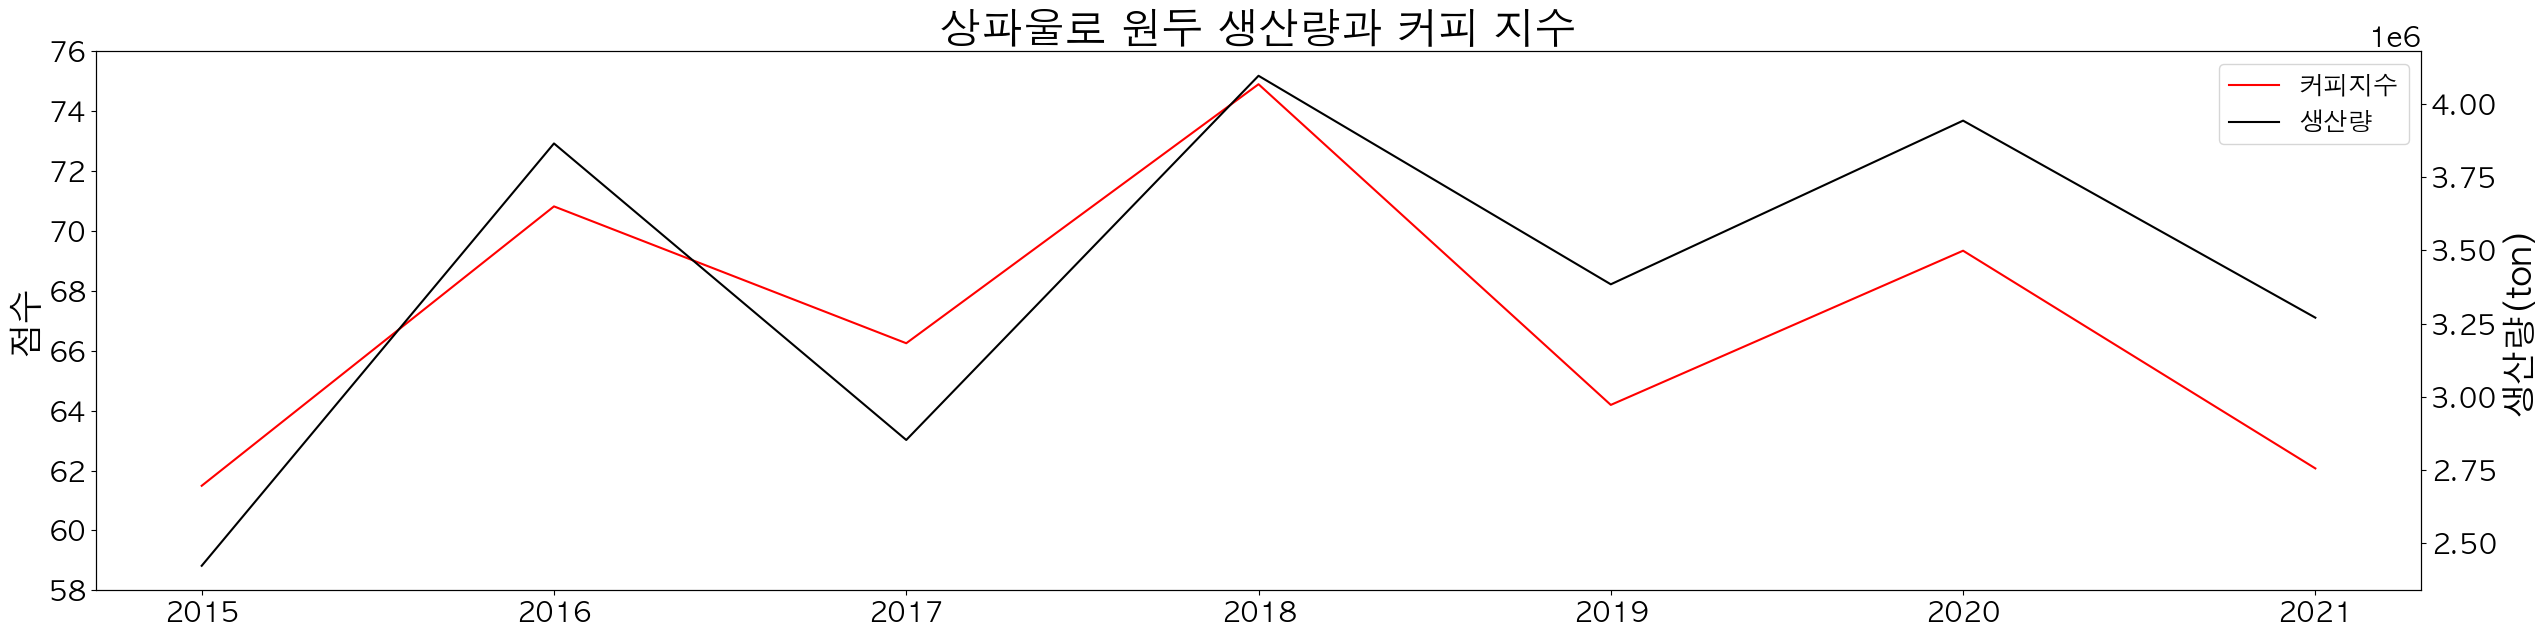

In [307]:
fig, ax1 = plt.subplots(figsize=(30, 7))
ax2 = ax1.twinx()

A = score[['커피재배지수']]
B = score[['브라질 커피 생산량']]
C = score[['상파울루 커피생산량']]
C = C[C.index<=2021]

line1 = ax1.plot(A.index, A['커피재배지수'], label='커피지수', color='r')
#line2 = ax2.plot(B.index, B['브라질 커피 생산량'], label='Brazil Production', color='k')
line3 = ax2.plot(C.index, C['상파울루 커피생산량'], label='생산량', color='k')

ax1.set_ylim([58, 76])
# ax2.set_ylim([0, 60])

lines = line1 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('점수', fontdict={'fontsize':25})
ax2.set_ylabel('생산량(ton)', fontdict={'fontsize':25})

plt.title('상파울로 원두 생산량과 커피 지수', fontdict = {'fontsize' : 30})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
plt.show()

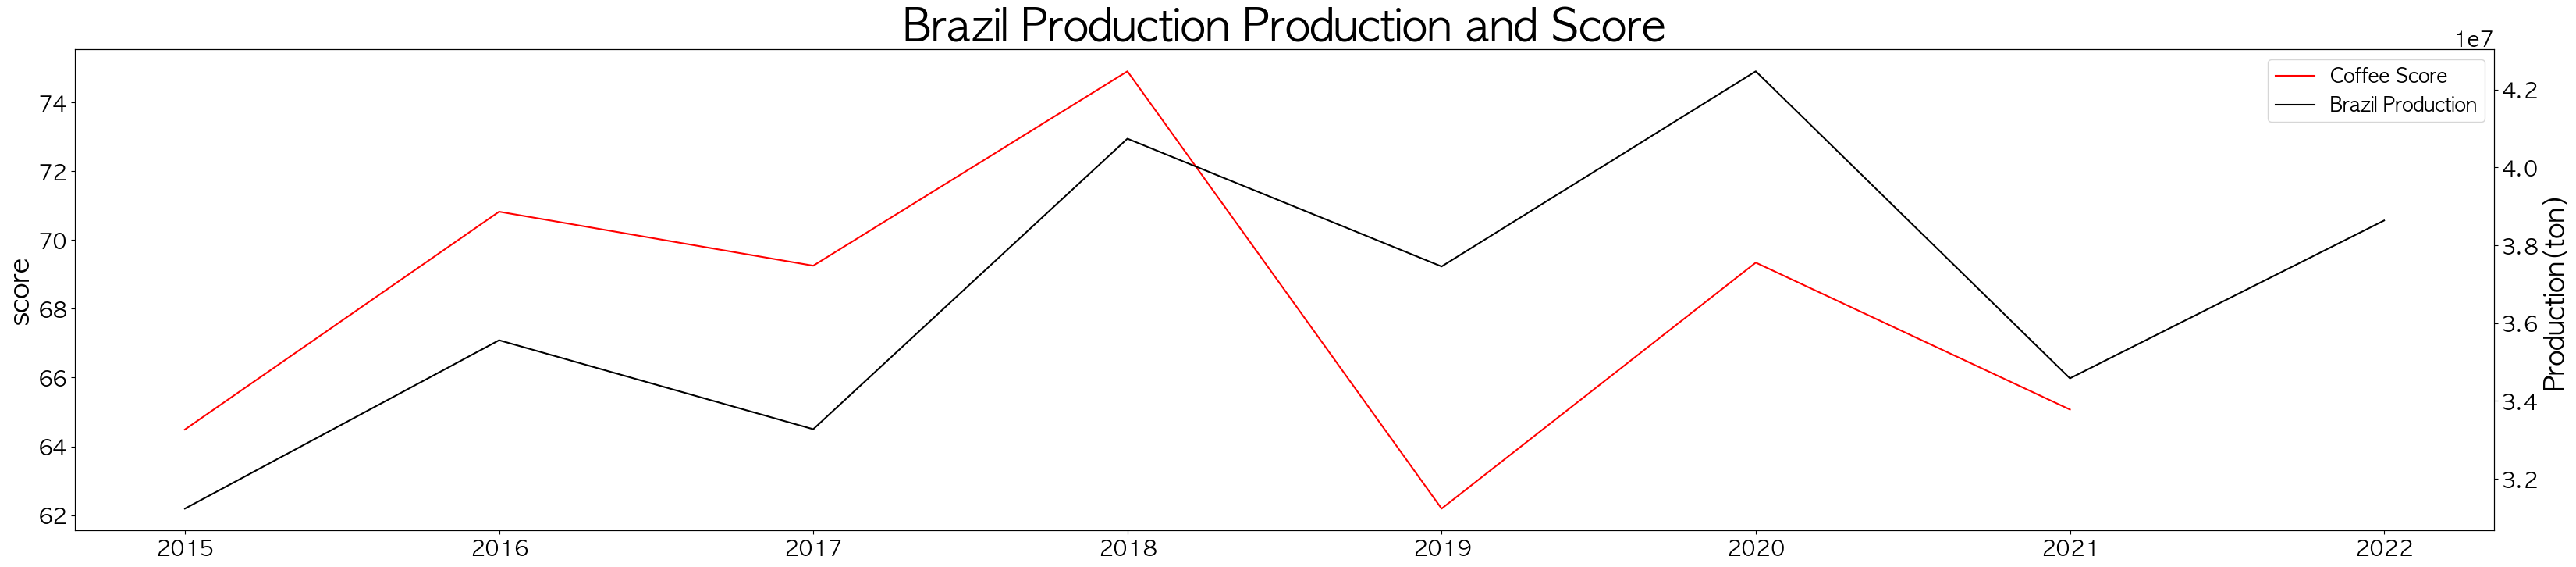

In [13]:
fig, ax1 = plt.subplots(figsize=(40, 8))
ax2 = ax1.twinx()

A = score[['커피재배지수']]
B = score[['브라질 커피 생산량']]
C = score[['상파울루 커피생산량']]

line1 = ax1.plot(A.index, A['커피재배지수'], label='Coffee Score', color='r')
line2 = ax2.plot(B.index, B['브라질 커피 생산량'], label='Brazil Production', color='k')
#line3 = ax2.plot(C.index, C['상파울루 커피생산량'], label='Sao Paulo Production', color='k')

# ax1.set_ylim([340, 385])
# ax2.set_ylim([0, 60])

lines = line1 + line2 
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('score', fontdict={'fontsize':25})
ax2.set_ylabel('Production(ton)', fontdict={'fontsize':25})

plt.title('Brazil Production Production and Score', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
plt.show()

# 브라질 원두 생산량

In [14]:
coffee = pd.read_excel('예측모델data/브라질원두생산량.xlsx')
coffee

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
0,9,2006,Brazil,2541088,2343902,2583027,1102
1,9,2006,Minas Gerais,1194479,1075993,1308283,1216
2,9,2006,São Paulo,236013,220186,259820,1180
3,9,2006,Paraná,100874,100874,131145,1300
4,10,2006,Brazil,2542552,2343158,2593131,1107
...,...,...,...,...,...,...,...
811,7,2023,Paraná,25800,25800,41400,1605
812,8,2023,Brazil,1926032,1912502,3308623,4007
813,8,2023,Minas Gerais,1071800,1071800,1687058,3970
814,8,2023,São Paulo,190948,188780,285021,3023


# 사용 데이터 가공 
## Xs

In [15]:
df = temp[['datetime', 'temp', 'tempmin', 'tempmax', 'humidity', 'windspeed', 'precip', 'daylight_duration']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 974
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           2922 non-null   object 
 1   temp               2922 non-null   float64
 2   tempmin            2922 non-null   float64
 3   tempmax            2922 non-null   float64
 4   humidity           2922 non-null   float64
 5   windspeed          2922 non-null   float64
 6   precip             2922 non-null   float64
 7   daylight_duration  2922 non-null   float64
dtypes: float64(7), object(1)
memory usage: 205.5+ KB


In [18]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [19]:
df['datetime_m'] = df['datetime'].dt.strftime('%Y-%m')

In [20]:
data_per_month = df.groupby(by='datetime_m').mean()

In [21]:
data_per_month

,temp,tempmin,tempmax,humidity,windspeed,precip,daylight_duration
datetime_m,,,,,,,
2015-01,24.935484,21.112903,30.509677,68.061290,21.658065,4.577419,13.394194
2015-02,23.285714,20.110714,28.160714,73.682143,21.682143,4.739286,12.879107
2015-03,21.970968,18.958065,26.596774,76.848387,19.893548,4.400000,12.220556
2015-04,20.656667,17.630000,25.206667,75.893333,22.150000,0.840000,11.541204
2015-05,18.516129,15.467742,22.435484,76.474194,19.641935,1.467742,10.982554
...,...,...,...,...,...,...,...
2022-08,16.761290,12.832258,22.241935,73.096774,19.919355,0.500000,11.324149
2022-09,16.376667,12.833333,21.210000,79.816667,20.070000,0.643333,11.966815
2022-10,20.300000,16.809677,25.490323,78.438710,20.141935,2.232258,12.649642


## y

In [22]:
coffee = pd.read_excel('예측모델data/브라질원두생산량.xlsx')
coffee

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
0,9,2006,Brazil,2541088,2343902,2583027,1102
1,9,2006,Minas Gerais,1194479,1075993,1308283,1216
2,9,2006,São Paulo,236013,220186,259820,1180
3,9,2006,Paraná,100874,100874,131145,1300
4,10,2006,Brazil,2542552,2343158,2593131,1107
...,...,...,...,...,...,...,...
811,7,2023,Paraná,25800,25800,41400,1605
812,8,2023,Brazil,1926032,1912502,3308623,4007
813,8,2023,Minas Gerais,1071800,1071800,1687058,3970
814,8,2023,São Paulo,190948,188780,285021,3023


In [23]:
cof = coffee[((coffee['year']==2015) | (coffee['year']==2016) |(coffee['year']==2017) |(coffee['year']==2018) |(coffee['year']==2019) | (coffee['year']==2020) |(coffee['year']==2021) | (coffee['year']==2022)) &(coffee['location']=='São Paulo')]

In [24]:
cof = cof.astype({'month':'str', 'year':'str'})
cof['datetime_m'] = cof['year']+'-'+cof['month']
cof['datetime_m'] = pd.to_datetime(cof['datetime_m'])
cof['datetime_m'] = cof['datetime_m'].dt.strftime('%Y-%m')

In [25]:
cof.reset_index(inplace=True)

In [26]:
cof

,index,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램),datetime_m
0,402,1,2015,São Paulo,169000,150000,195000,1300,2015-01
1,406,2,2015,São Paulo,169000,150000,165000,1100,2015-02
2,410,3,2015,São Paulo,169000,150000,165000,1100,2015-03
3,414,4,2015,São Paulo,169000,150000,165000,1100,2015-04
4,418,5,2015,São Paulo,169000,150000,165000,1100,2015-05
...,...,...,...,...,...,...,...,...,...
91,766,8,2022,São Paulo,191627,189659,264984,4396,2022-08
92,770,9,2022,São Paulo,199633,197665,266268,4346,2022-09
93,774,10,2022,São Paulo,199633,197665,266268,4346,2022-10
94,778,11,2022,São Paulo,199633,197665,266946,12821,2022-11


In [27]:
data_per_month['production'] = np.NaN

In [28]:
for i in range(len(data_per_month)):
    for j in range(len(cof)):
        if data_per_month.index[i] == cof['datetime_m'][j]:
            data_per_month['production'][i] = cof['생산량(톤)'][j]

In [29]:
data_per_month

,temp,tempmin,tempmax,humidity,windspeed,precip,daylight_duration,production
datetime_m,,,,,,,,
2015-01,24.935484,21.112903,30.509677,68.061290,21.658065,4.577419,13.394194,195000.0
2015-02,23.285714,20.110714,28.160714,73.682143,21.682143,4.739286,12.879107,165000.0
2015-03,21.970968,18.958065,26.596774,76.848387,19.893548,4.400000,12.220556,165000.0
2015-04,20.656667,17.630000,25.206667,75.893333,22.150000,0.840000,11.541204,165000.0
2015-05,18.516129,15.467742,22.435484,76.474194,19.641935,1.467742,10.982554,165000.0
...,...,...,...,...,...,...,...,...
2022-08,16.761290,12.832258,22.241935,73.096774,19.919355,0.500000,11.324149,264984.0
2022-09,16.376667,12.833333,21.210000,79.816667,20.070000,0.643333,11.966815,266268.0
2022-10,20.300000,16.809677,25.490323,78.438710,20.141935,2.232258,12.649642,266268.0


In [30]:
len(data_per_month)

96

In [31]:
sp = coffee[(coffee['location']=='São Paulo')]

In [32]:
sp

,month,year,location,재배면적(헥타르),수확면적(헥타르),생산량(톤),평균 수확량(헥타르당 킬로그램)
2,9,2006,São Paulo,236013,220186,259820,1180
6,10,2006,São Paulo,236013,220186,259820,1180
10,11,2006,São Paulo,236013,220186,259820,1180
14,12,2006,São Paulo,236013,220186,259820,1180
18,1,2007,São Paulo,236010,220186,187158,850
...,...,...,...,...,...,...,...
798,4,2023,São Paulo,190948,188780,285021,3023
802,5,2023,São Paulo,190948,188780,285021,3023
806,6,2023,São Paulo,190948,188780,285021,3023
810,7,2023,São Paulo,190948,188780,285021,3023


In [33]:
sp = sp.astype({'month':'str', 'year':'str'})
sp['datetime_m'] = sp['year']+'-'+sp['month']
sp['datetime_m'] = pd.to_datetime(sp['datetime_m'])
sp['datetime_m'] = sp['datetime_m'].dt.strftime('%Y-%m')

In [34]:
sp['datetime_m'] = pd.to_datetime(sp['datetime_m'])

In [35]:
from datetime import datetime

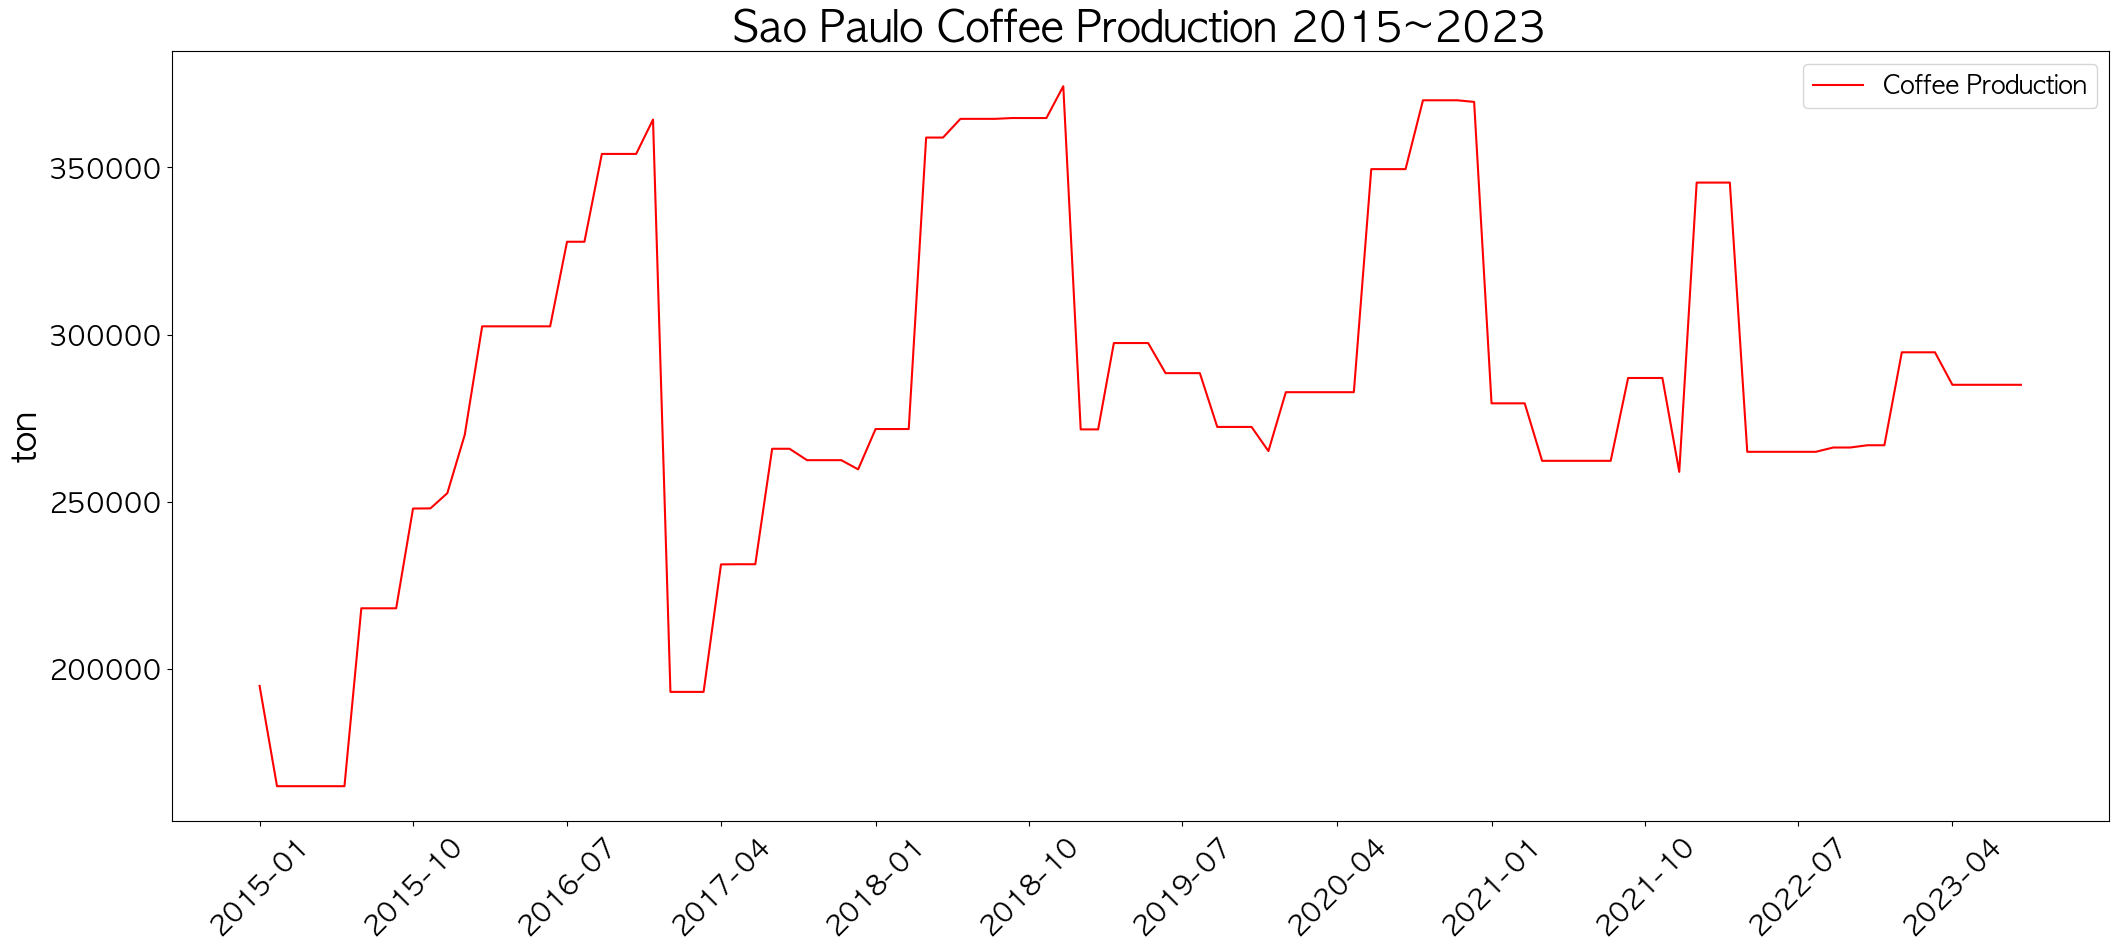

In [36]:
a = sp[sp['datetime_m'].dt.year>=2015]
#a['datetime_m'] = str(a['datetime_m'])

fig, ax1 = plt.subplots(figsize=(25, 10))

line1 = ax1.plot(a['datetime_m'], a['생산량(톤)'], label='Coffee Production', color='r')

# line2 = ax1.plot(a['Date'], a['Low'], label='Low Coffee Price', color='b')

lines = line1
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('ton', fontdict={'fontsize':25})

#plt.xticks(range(len(a))[::len(a)//300], a.index[::len(a)//300].strftime('%Y-%m'))
plt.xticks(a['datetime_m'][::9], a['datetime_m'][::9].dt.strftime('%Y-%m'), rotation=45)
plt.title('Sao Paulo Coffee Production 2015~2023', fontdict = {'fontsize' : 30})
# plt.axvline(x=datetime(2022,2), color='0.5', linestyle='--', linewidth=2)
plt.rcParams['font.size'] = 20
plt.show()

# model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [331]:
X = data_per_month.drop('production', axis=1)
y = data_per_month.loc[:, ['production']]

In [332]:
X_train = X[(X.index < '2022-01') & (X.index >= '2016-01')]
X_test = X[X.index >= '2022-01']
y_train = y[(y.index < '2022-01') & (y.index >= '2016-01')]
y_test = y[y.index >= '2022-01']

In [228]:
X

,temp,tempmin,tempmax,humidity,windspeed,precip,daylight_duration
datetime_m,,,,,,,
2015-01,24.935484,21.112903,30.509677,68.061290,21.658065,4.577419,13.394194
2015-02,23.285714,20.110714,28.160714,73.682143,21.682143,4.739286,12.879107
2015-03,21.970968,18.958065,26.596774,76.848387,19.893548,4.400000,12.220556
2015-04,20.656667,17.630000,25.206667,75.893333,22.150000,0.840000,11.541204
2015-05,18.516129,15.467742,22.435484,76.474194,19.641935,1.467742,10.982554
...,...,...,...,...,...,...,...
2022-08,16.761290,12.832258,22.241935,73.096774,19.919355,0.500000,11.324149
2022-09,16.376667,12.833333,21.210000,79.816667,20.070000,0.643333,11.966815
2022-10,20.300000,16.809677,25.490323,78.438710,20.141935,2.232258,12.649642


## 짝수년도 예측

In [145]:
X_train2 = X[(X.index < '2021-01') & (X.index >= '2020-01')| (X.index < '2019-01') & (X.index >= '2018-01') | (X.index < '2017-01') & (X.index >= '2016-01')]

In [146]:
y_train2 = y[(y.index < '2021-01') & (y.index >= '2020-01')| (y.index < '2019-01') & (y.index >= '2018-01') | (y.index < '2017-01') & (y.index >= '2016-01')]

In [147]:
print('X_train:', len(X_train))
print('X_train2:', len(X_train2))
print('y_train:', len(y_train))
print('y_train2:', len(y_train2))
print('X_test:', len(X_test))
print('y_test:', len(y_test))

X_train: 72
X_train2: 36
y_train: 72
y_train2: 36
X_test: 12
y_test: 12


In [315]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
tmp = pd.DataFrame(linear_reg.coef_)
tmp.columns = X_test.columns
tmp.T

,0
temp,-87090.495195
tempmin,58962.281951
tempmax,16188.460599
humidity,-9167.014189
windspeed,-1999.280478
precip,-3053.704099
daylight_duration,24735.713420


In [248]:
y_train_pred2 = linear_reg2.predict(X_train2)
train_mae2 = mean_absolute_error(y_train2, y_train_pred2)
train_mae2

24555.70970005521

In [249]:
y_pred2 = linear_reg2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred2)
mae

55160.84584173199

In [279]:
# result
y_predict_train = pd.DataFrame(y_train_pred2, index=y_train2.index, columns=['predict'])
y_predict2 = pd.DataFrame(y_pred2, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae2)
print('Test MAE:', mae)

Train MAE: 24555.70970005521
Test MAE: 28453.900555623648


In [280]:
train_result_y_2 = y_train2.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict2, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

## 홀수년도 예측

In [253]:
X_train3 = X[(X.index < '2022-01') & (X.index >= '2021-01')| (X.index < '2020-01') & (X.index >= '2019-01')| (X.index < '2018-01') & (X.index >= '2017-01') ]

In [254]:
y_train3 = y[(X.index < '2022-01') & (X.index >= '2021-01')| (y.index < '2020-01') & (y.index >= '2019-01')| (y.index < '2018-01') & (y.index >= '2017-01') ]

In [255]:
print('X_train:', len(X_train))
print('X_train3:', len(X_train3))
print('y_train:', len(y_train))
print('y_train3:', len(y_train3))
print('X_test:', len(X_test))
print('y_test:', len(y_test))

X_train: 72
X_train3: 36
y_train: 72
y_train3: 36
X_test: 12
y_test: 12


In [256]:
linear_reg3 = LinearRegression()
linear_reg3.fit(X_train3, y_train3)

LinearRegression()

In [257]:
# 가중치 확인
tmp = pd.DataFrame(linear_reg3.coef_)
tmp.columns = X_test.columns
tmp.T

,0
temp,-17041.644799
tempmin,-5318.013198
tempmax,22632.210535
humidity,3495.228587
windspeed,3852.094547
precip,-1510.995472
daylight_duration,-9163.457917


In [258]:
y_train_pred3 = linear_reg3.predict(X_train3)
train_mae3 = mean_absolute_error(y_train3, y_train_pred3)
train_mae3

18331.34441567496

In [259]:
y_pred3 = linear_reg3.predict(X_test)
mae = mean_absolute_error(y_test, y_pred3)
mae

28453.900555623648

In [281]:
# result
y_predict_train = pd.DataFrame(y_train_pred3, index=y_train3.index, columns=['predict'])
y_predict3 = pd.DataFrame(y_pred3, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae3)
print('Test MAE:', mae)

Train MAE: 18331.34441567496
Test MAE: 28453.900555623648


In [282]:
train_result_y_3 = y_train3.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict3, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

In [239]:
train_result = pd.concat([train_result_y_2,train_result_y_3])

In [262]:
train_result.reset_index(inplace=True)
train_result = train_result.sort_values(by=['datetime_m'], axis=0)
train_result.set_index('datetime_m', inplace=True)

In [271]:
y_train = y[(y.index < '2022-01') & (X.index >= '2016-01')]

In [285]:
(y_predict2+y_predict3)/2

,predict
datetime_m,
2022-01,277227.522848
2022-02,288293.155691
2022-03,270701.993747
2022-04,288257.664031
2022-05,295284.343745
2022-06,292783.223493
2022-07,300985.490977
2022-08,317082.125779
2022-09,302866.002313


In [286]:
y_predict2

,predict
datetime_m,
2022-01,285030.365122
2022-02,300342.754605
2022-03,265004.343261
2022-04,294313.228990
2022-05,325006.648628
2022-06,303954.841844
2022-07,333944.859356
2022-08,344129.443758
2022-09,314541.036343


In [284]:
y_predict3

,predict
datetime_m,
2022-01,269424.680574
2022-02,276243.556777
2022-03,276399.644233
2022-04,282202.099071
2022-05,265562.038862
2022-06,281611.605141
2022-07,268026.122598
2022-08,290034.807800
2022-09,291190.968284


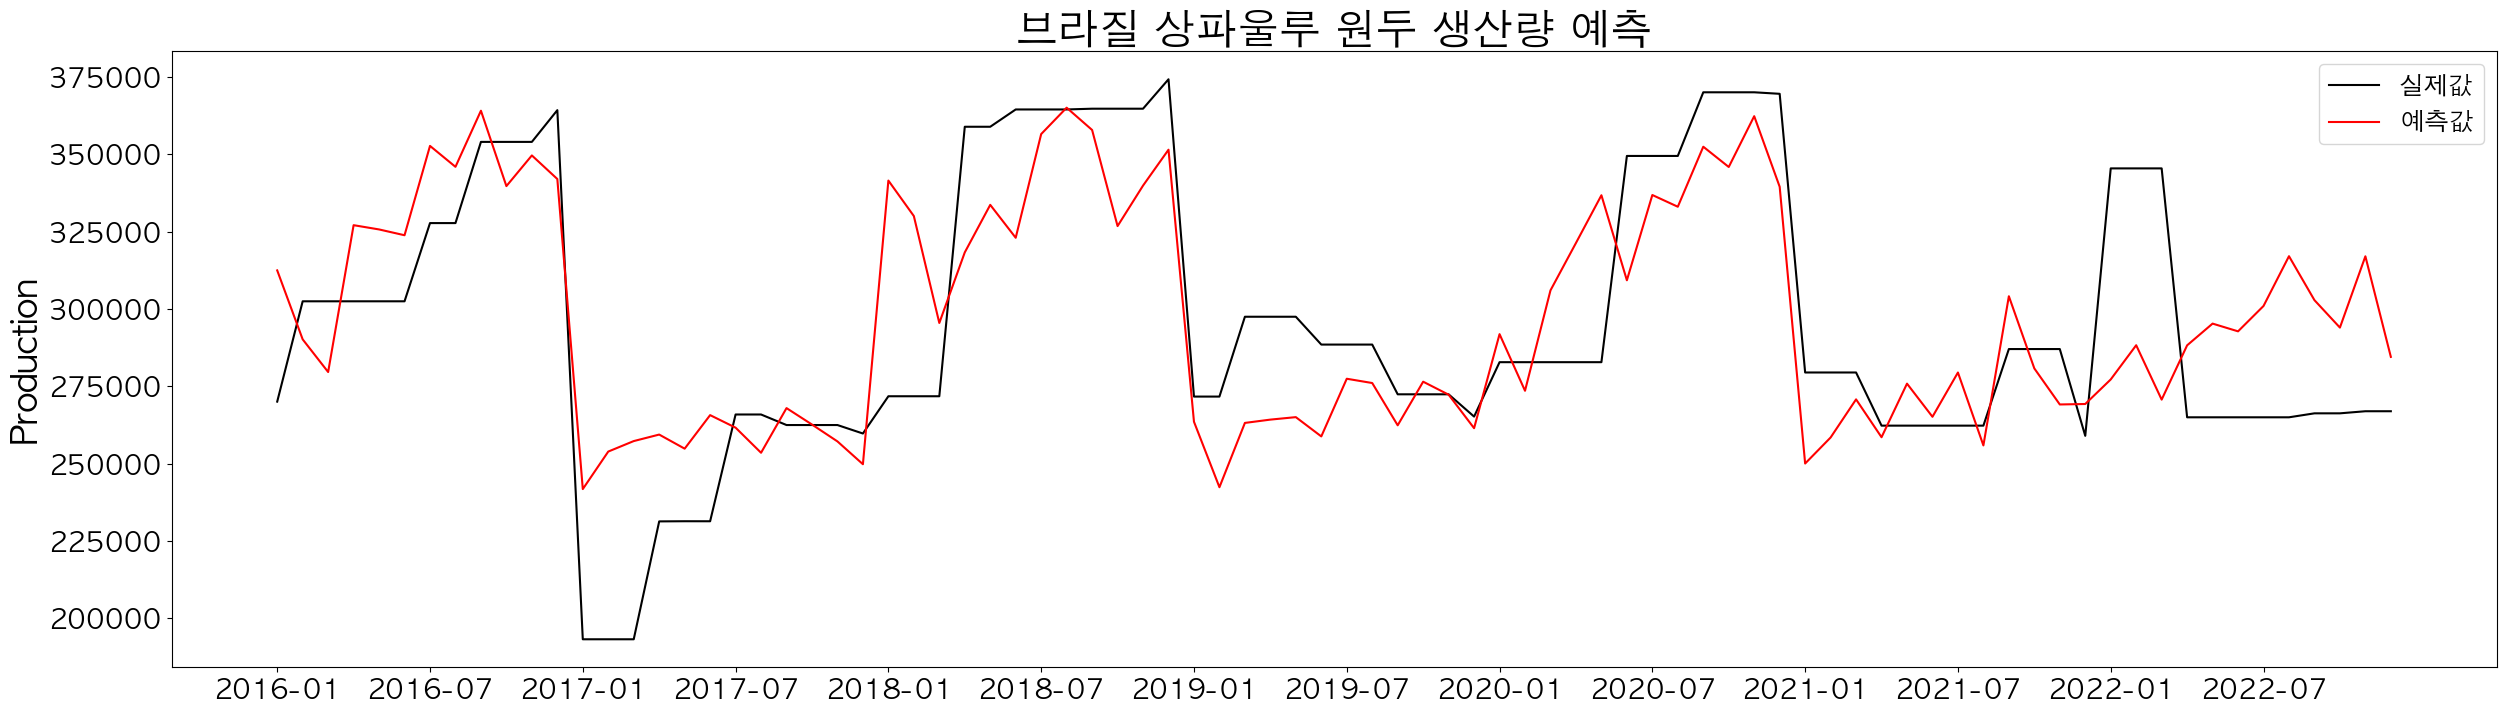

In [314]:
# graph
fig, ax1 = plt.subplots(figsize=(30, 8))

A = pd.concat([y_train, y_test]) # actual value
B = pd.concat([train_result, (y_predict2+y_predict3)/2]) # predicted value

# A = y_train # actual value
# B = train_result # predicted value

line1 = ax1.plot(A.index, A['production'], label='실제값', color='k')
line2 = ax1.plot(B.index, B['predict'], label='예측값', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Production', fontdict={'fontsize':25})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#A.reset_index(inplace=True)
plt.xticks(A.index[::6], rotation=0)
plt.title(f'브라질 상파울루 원두 생산량 예측', fontdict = {'fontsize' : 30})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()

In [273]:
y_predict = pd.DataFrame(y_pred2, index=y_test.index, columns=['predict'])

In [333]:
y_train = y[(y.index < '2022-01') & (y.index >= '2016-01')]

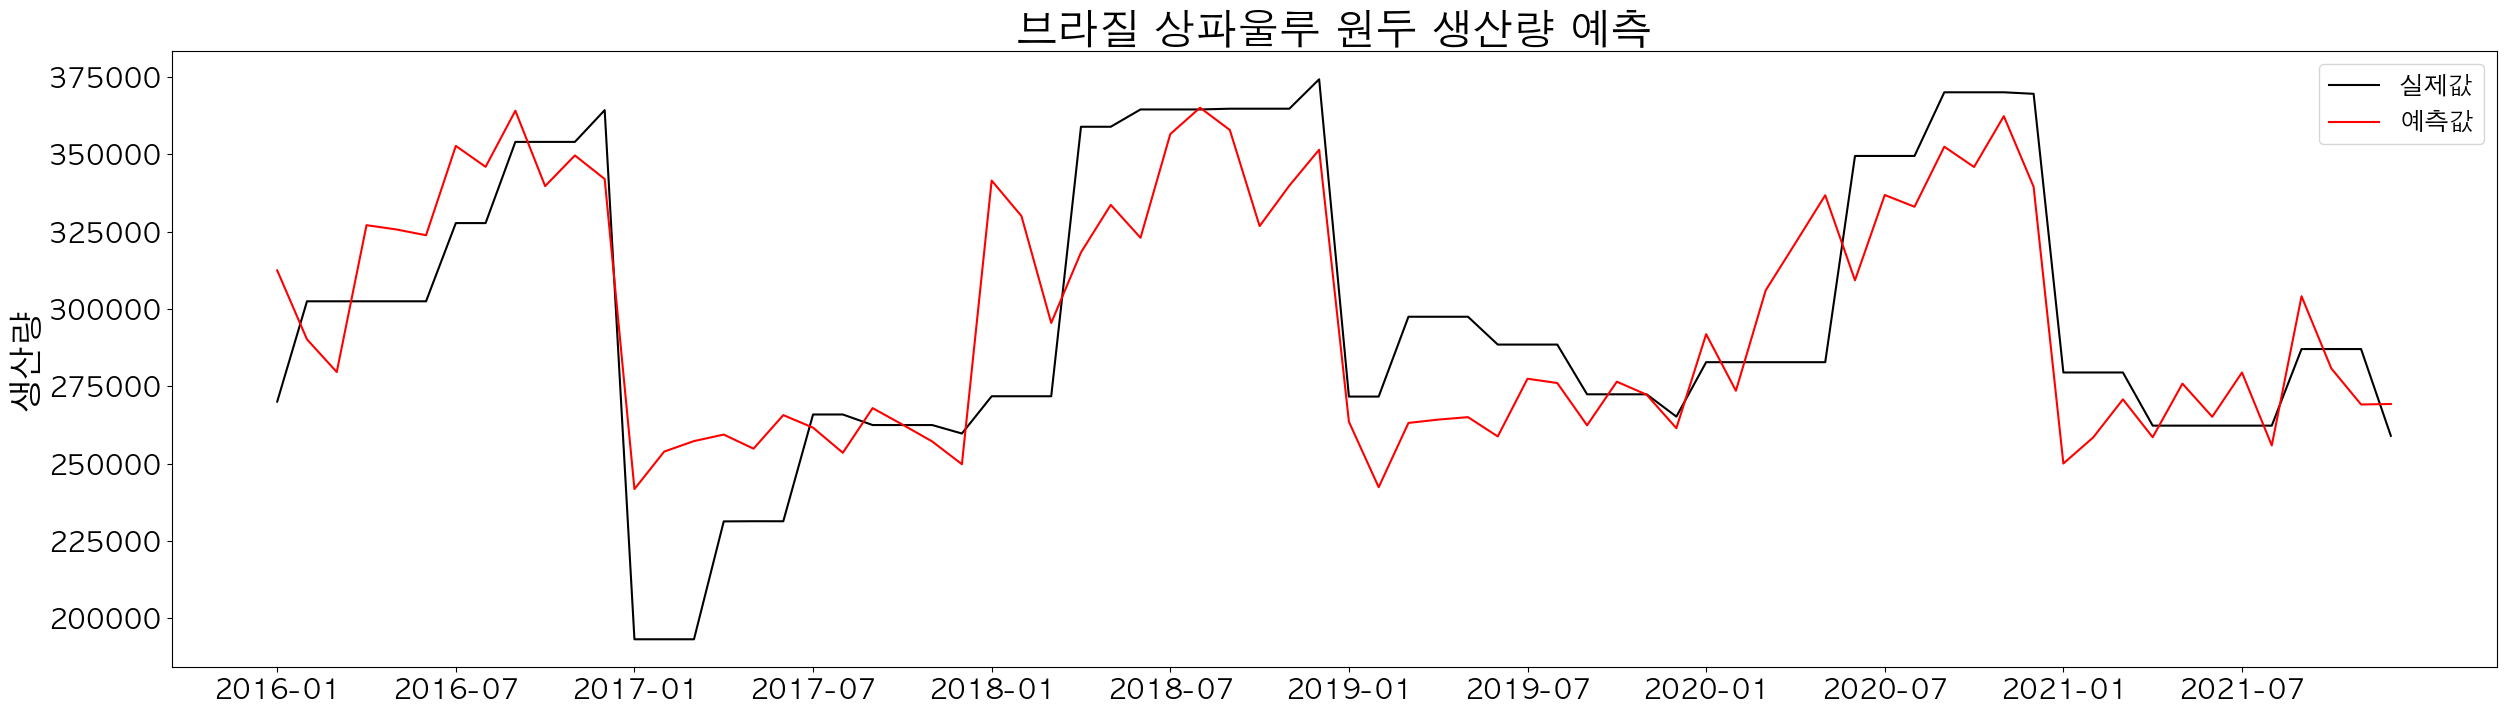

In [339]:
# graph
fig, ax1 = plt.subplots(figsize=(30, 8))

A = y_train # actual value
B = train_result # predicted value

line1 = ax1.plot(A.index, A['production'], label='실제값', color='k')
line2 = ax1.plot(B.index, B['predict'], label='예측값', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('생산량', fontdict={'fontsize':25})

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#A.reset_index(inplace=True)
plt.xticks(A.index[::6])
plt.title(f'브라질 상파울루 원두 생산량 예측', fontdict = {'fontsize' : 30})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()

In [330]:
y_train

,production
datetime_m,
2016-01,-0.258293
2016-02,0.344340
2016-03,0.344340
2016-04,0.344340
2016-05,0.344340
...,...
2021-08,-0.402515
2021-09,0.057492
2021-10,0.057492


In [91]:
# result
y_predict_train = pd.DataFrame(y_train_pred, index=y_train.index, columns=['predict'])
y_predict = pd.DataFrame(y_pred, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae)
print('Test MAE:', mae)

Train MAE: 35863.57535008588
Test MAE: 46760.219940964285


In [92]:
train_result_y = y_train.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

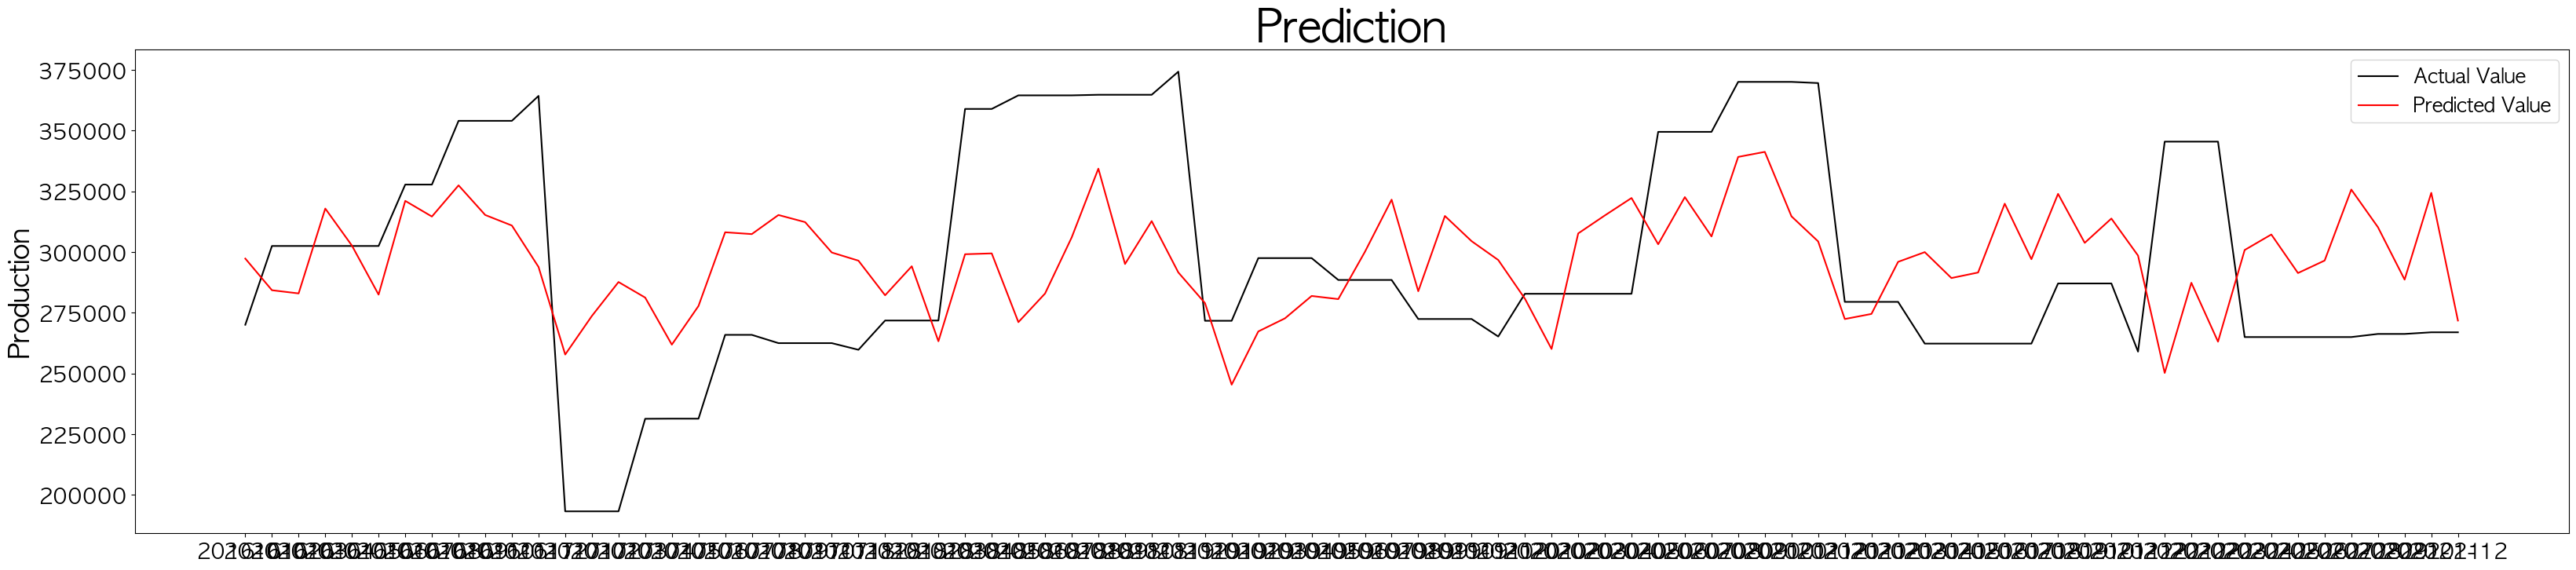

In [93]:
# graph
fig, ax1 = plt.subplots(figsize=(40, 8))

A = pd.concat([y_train, y_test]) # actual value
B = pd.concat([y_predict_train,y_predict]) # predicted value

line1 = ax1.plot(A.index, A['production'], label='Actual Value', color='k')
line2 = ax1.plot(B.index, B['predict'], label='Predicted Value', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Production', fontdict={'fontsize':25})
#ax2.set_ylabel('Residual', fontdict={'fontsize':25})

# A.reset_index(inplace=True)
# A['datetime_m'] = pd.to_datetime(A['datetime_m'])
# a = A[(A['datetime_m'].dt.month==3)|(A['datetime_m'].dt.month==9)]
# a.set_index('datetime_m', inplace=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(a.index[::2], a.index[::2].strftime('%Y-%m-%d'), rotation=45)
plt.title(f'Prediction', fontdict = {'fontsize' : 40})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()

# 정규화model

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [316]:
scaling = data_per_month.copy()

In [317]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(scaling)
std_df = pd.DataFrame(std_df, index=scaling.index, columns=scaling.columns)
scaling = std_df
scaling

,temp,tempmin,tempmax,humidity,windspeed,precip,daylight_duration,production
datetime_m,,,,,,,,
2015-01,1.917854,1.680974,2.130292,-1.087424,0.843364,1.043586,1.299527,-1.652283
2015-02,1.222512,1.298922,1.154819,0.266508,0.856699,1.119176,0.779253,-2.209485
2015-03,0.668375,0.859512,0.505350,1.029182,-0.133885,0.960732,0.114069,-2.209485
2015-04,0.114426,0.353232,-0.071931,0.799132,1.115814,-0.701766,-0.572124,-2.209485
2015-05,-0.787763,-0.471058,-1.222742,0.939047,-0.273236,-0.408614,-1.136400,-2.209485
...,...,...,...,...,...,...,...,...
2022-08,-1.527389,-1.475750,-1.303119,0.125506,-0.119592,-0.860544,-0.791365,-0.352441
2022-09,-1.689499,-1.475340,-1.731659,1.744171,-0.036160,-0.793608,-0.142227,-0.328593
2022-10,-0.035901,0.040511,0.045865,1.412253,0.003680,-0.051590,0.547477,-0.328593


In [319]:
X = scaling.drop('production', axis=1)
y = scaling.loc[:, ['production']]

In [320]:
X_train = X[(X.index < '2022-01') & (X.index >= '2016-01')]
X_test = X[X.index >= '2022-01']
y_train = y[(y.index < '2022-01') & (X.index >= '2016-01')]
y_test = y[y.index >= '2022-01']

In [321]:
X_train2 = X[(X.index < '2021-01') & (X.index >= '2020-01')| (X.index < '2019-01') & (X.index >= '2018-01') | (X.index < '2017-01') & (X.index >= '2016-01')]

In [322]:
y_train2 = y[(y.index < '2021-01') & (y.index >= '2020-01')| (y.index < '2019-01') & (y.index >= '2018-01') | (y.index < '2017-01') & (y.index >= '2016-01')]

In [323]:
print('X_train:', len(X_train))
print('y_train:', len(y_train))
print('X_test:', len(X_test))
print('y_test:', len(y_test))

X_train: 72
y_train: 72
X_test: 12
y_test: 12


In [324]:
linear_reg = LinearRegression()
linear_reg.fit(X_train2, y_train2)

LinearRegression()

In [325]:
# 가중치 확인
tmp = pd.DataFrame(linear_reg.coef_)
tmp.columns = X_test.columns
tmp.T

,0
temp,-3.837846
tempmin,2.872722
tempmax,0.724033
humidity,-0.706846
windspeed,-0.067048
precip,-0.121453
daylight_duration,0.454846


In [102]:
y_train_pred = linear_reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mae

0.6661089113486285

In [103]:
y_pred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.8684967657365359

In [104]:
# result
y_predict_train = pd.DataFrame(y_train_pred, index=y_train.index, columns=['predict'])
y_predict = pd.DataFrame(y_pred, index=y_test.index, columns=['predict'])

print('Train MAE:', train_mae)
print('Test MAE:', mae)

Train MAE: 0.6661089113486285
Test MAE: 0.8684967657365359


In [105]:
train_result_y = y_train.merge(y_predict_train, left_index=True, right_index=True, how = "outer")
test_result_y = y_test.merge(y_predict, left_index=True, right_index=True, how = "outer")

result_y = pd.concat([train_result_y, test_result_y])

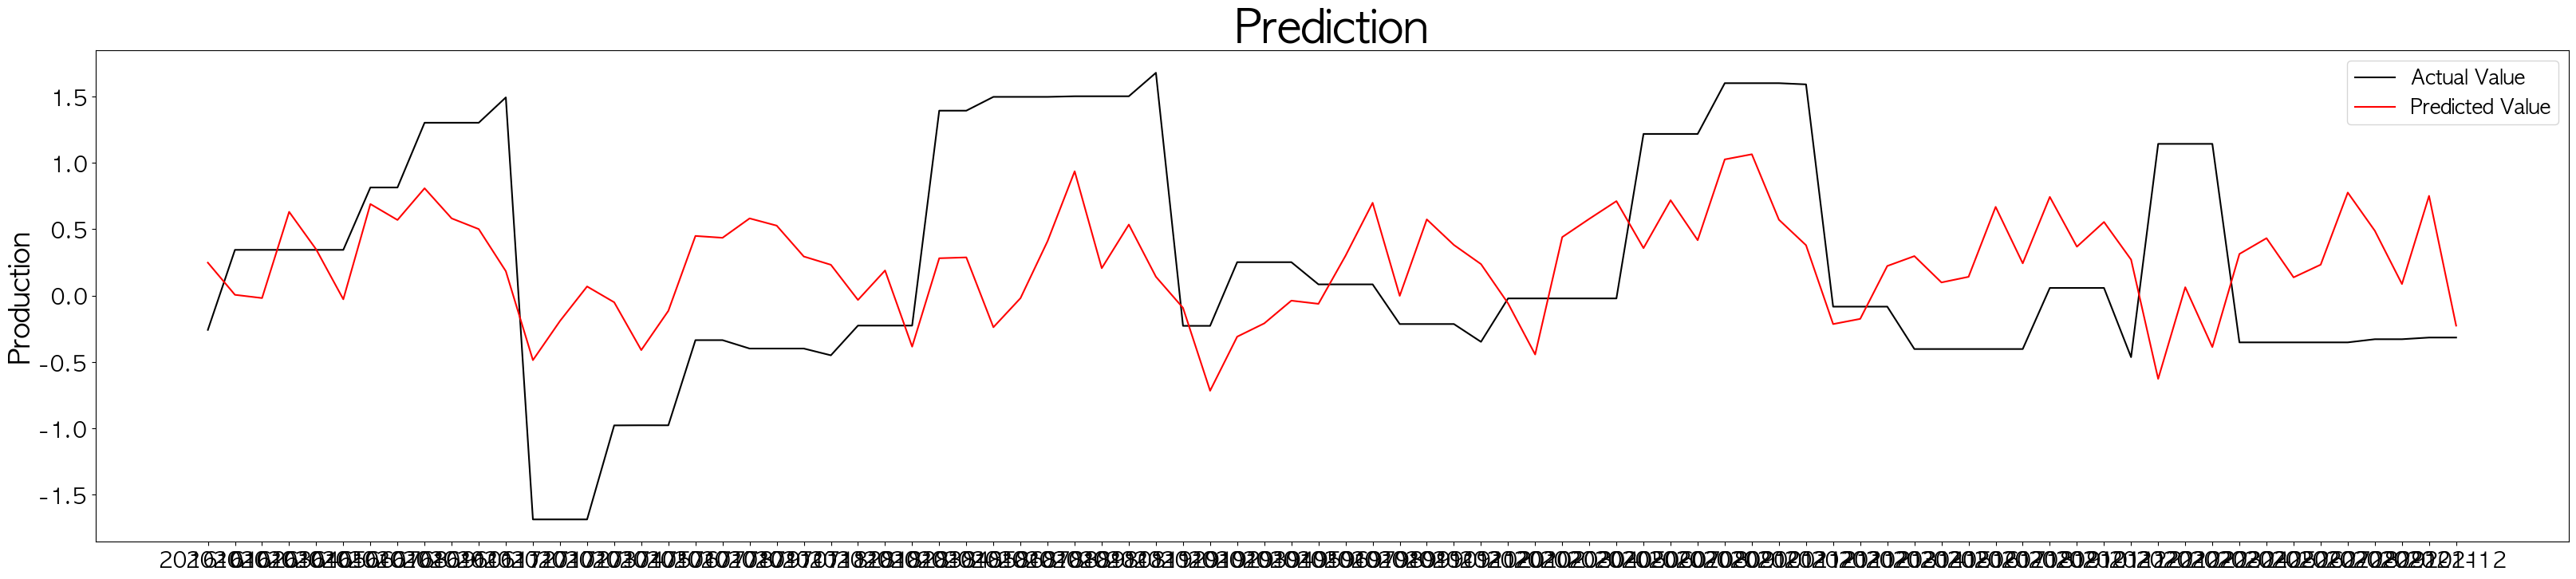

In [106]:
# graph
fig, ax1 = plt.subplots(figsize=(40, 8))

A = pd.concat([y_train, y_test]) # actual value
B = pd.concat([y_predict_train,y_predict]) # predicted value

line1 = ax1.plot(A.index, A['production'], label='Actual Value', color='k')
line2 = ax1.plot(B.index, B['predict'], label='Predicted Value', color='r')
#line3 = ax2.plot(result_y.index, abs(result_y['res']), label='Residual', color='0.5')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, fontsize = 18, loc='upper right')
ax1.set_ylabel('Production', fontdict={'fontsize':25})
#ax2.set_ylabel('Residual', fontdict={'fontsize':25})

# A.reset_index(inplace=True)
# A['datetime_m'] = pd.to_datetime(A['datetime_m'])
# a = A[(A['datetime_m'].dt.month==3)|(A['datetime_m'].dt.month==9)]
# a.set_index('datetime_m', inplace=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(a.index[::2], a.index[::2].strftime('%Y-%m-%d'), rotation=45)
plt.title(f'Prediction', fontdict = {'fontsize' : 40})
#plt.title(f'Train MAE: {round(train_mae, 2)}, Test MAE: {round(mae, 2)}', fontdict = {'fontsize' : 40})
plt.rcParams['font.size'] = 20
# plt.axhline(3.1, color='0.5', linestyle='--', linewidth=2)
# plt.axvline(x=datetime(2022,2,1), color='0.5', linestyle='--', linewidth=2)
plt.show()

print()

# 연별 예측 -> 오버피팅